In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.pyplot as figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#read data
df = pd.read_csv('./movies.csv')
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning
 #### Finding missing value  

In [37]:

# data cleaning
# - find missing values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Replace nan values to median for budget and gross


In [38]:
# - Replace nan values to median for budget and gross
print('\n',df['budget'].describe())
print(f'\nMedian of budget {df["budget"].median():,.0f}')
df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)


for col in ['budget', 'gross']:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')



 count    5.497000e+03
mean     3.558988e+07
std      4.145730e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.050000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

Median of budget 20,500,000
budget - 0.0%
gross - 0.0%


####  Change data type of budget and gross


In [39]:
# - Change data type of budget and gross
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [56]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,39
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,35
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,32
6646,2145,5,0,2015,221,7.1,370000.0,1189,706,2721,55,190000000,1515341399,2281,137.0,35
7494,2131,4,2,2019,2676,6.8,148000.0,432,1950,1527,55,150000000,1450026933,2315,103.0,39


In [41]:
import re
x = df['released'].astype(str).str[:]
y = []
for i in x:
    m = re.search('\d{4}', i)
    if m:
        y.append(m.group())
    else:
        y.append(None)
print(y)


['1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1984', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1980', '1983', '1980', '1980', '1980', '1980', '1980', '1980', '1981', '1980', '1980', '1980', '1980', '1982', '1981', '1981', '1981', '1981', '1983', '1982', '1981', '1981', '1981', '1982', '1982', '1981', '1983', '1981', '1981', '1981', '1981', '1981', '1981', '1981', '1981', '1981', '1981', '1981', '1982', '1981', '1982', '1981', '1981', '1981', '1981', '1981', '1981',

In [42]:
df['yearcorrect'] = y

In [43]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


#### Order by Gross column 

In [44]:
# Order by Gross column 
df.sort_values(by=['gross'], inplace=True, ascending=False)

#### Drop any duplicates


In [45]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


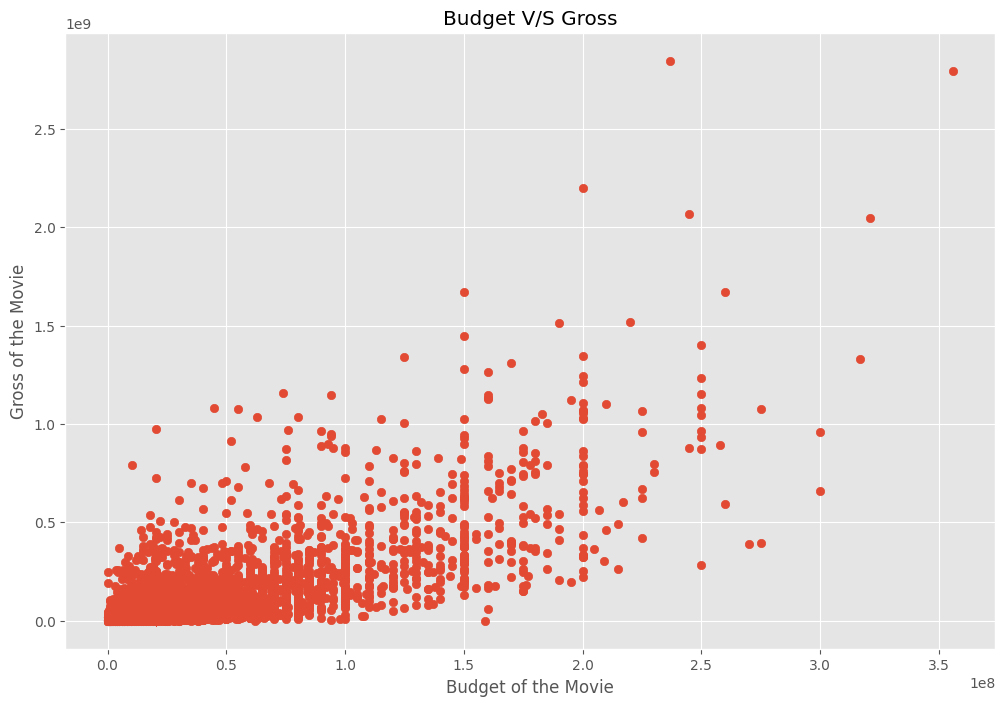

In [47]:
# Assuming The Most correlated fields with gross are 
#  - Budget v/s Gross
#  - Company v/s Gross

# To find or visualize the relation between budget and gross is by scatter plot

plt.scatter(x=df['budget'], y=df['gross'])

# Lets give some information
plt.title('Budget V/S Gross')
plt.xlabel('Budget of the Movie')
plt.ylabel('Gross of the Movie')

plt.show()

#### Visualize using seaborn 


<Axes: xlabel='budget', ylabel='gross'>

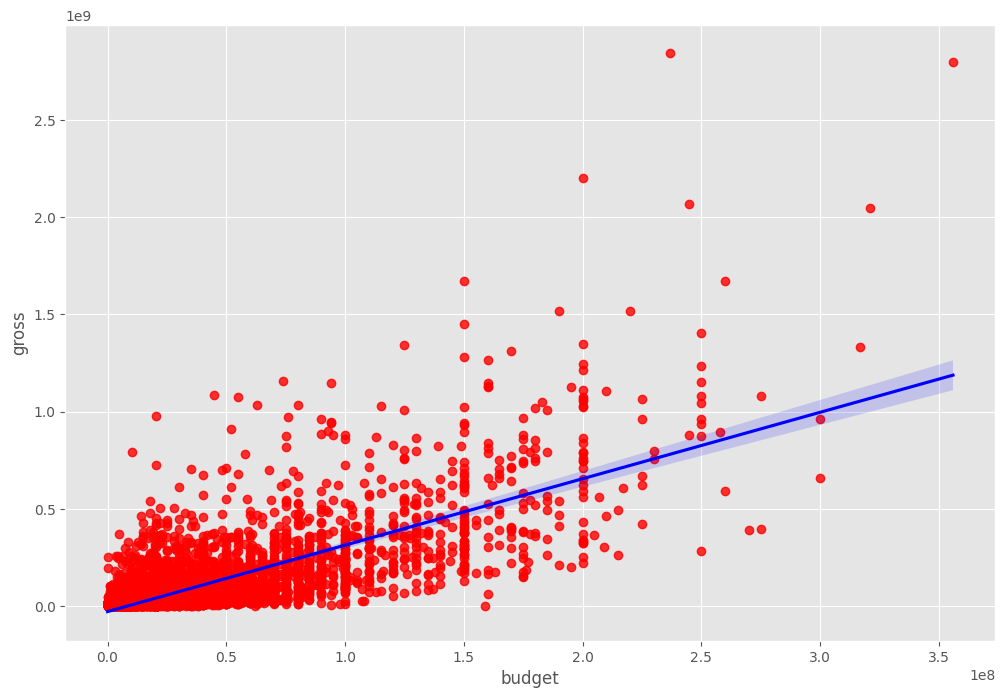

In [48]:
# Visualize using seaborn 

sns.regplot(x=df['budget'], y=df['gross'], data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


### Find correlation for only numeric types
### Methods of correlation are :
 - pearson
 - kendall
 - spearman

In [49]:
# Find correlation for only numeric types
# Methods of correlation are :
# - pearson
# - kendall
# - spearman


print(df.corr(numeric_only=True))
print('We found that budget and gross has high correlation')

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.291690  0.259504  0.120811
score    0.097995  1.000000  0.409182  0.061979  0.185583  0.399451
votes    0.222945  0.409182  1.000000  0.460932  0.632103  0.309212
budget   0.291690  0.061979  0.460932  1.000000  0.745881  0.273363
gross    0.259504  0.185583  0.632103  0.745881  1.000000  0.244360
runtime  0.120811  0.399451  0.309212  0.273363  0.244360  1.000000
We found that budget and gross has high correlation


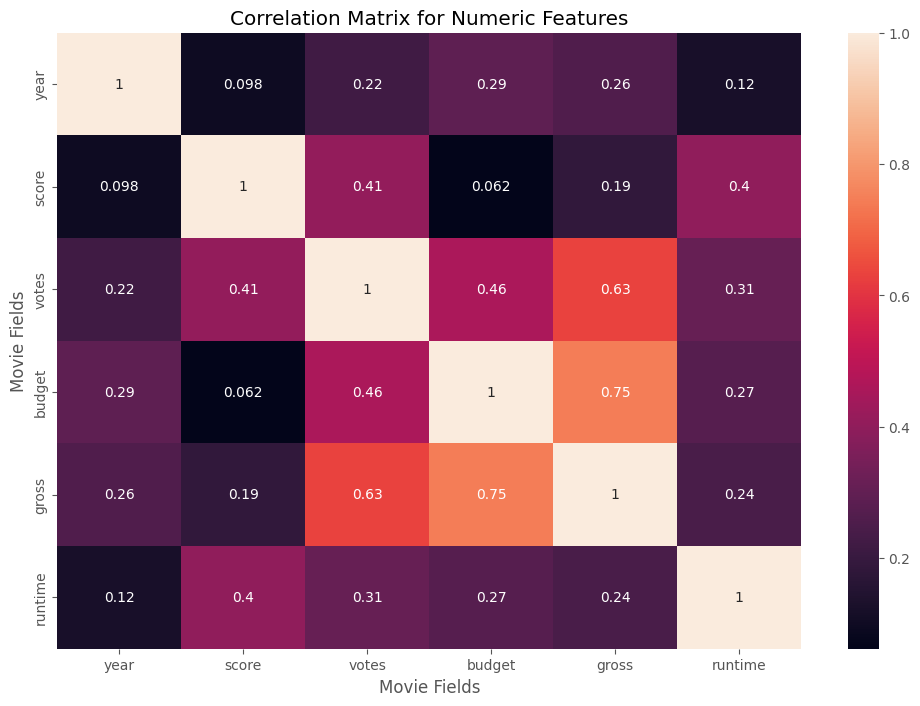

In [50]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Fields')
plt.ylabel('Movie Fields')
plt.show()

### Convert Object type feature like Company Features to numeric or categoric type


In [51]:
# Convert Object type feature like Company Features to numeric or categoric type

df_normalized = df

for col in df_normalized.columns:
    if df_normalized[col].dtype == 'object':
        df_normalized[col] = df_normalized[col].astype('category')
        df_normalized[col] = df_normalized[col].cat.codes

df_normalized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,20500000,1400,477,103.0,21
7625,6720,-1,4,2019,1149,5.7,320.0,2546,2565,1915,55,20500000,790,2308,104.0,39
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,20500000,682,1992,93.0,40
2417,3406,-1,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0,13


In [52]:
df_normalized.sort_values(by=['gross'], inplace=True, ascending=False)

print(df_normalized.corr())
print('We found that budget and gross has high correlation')

                 name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020921 -0.108776 -0.328484  0.291690  0.011120  0.061979   
gross        0.006601 -0.

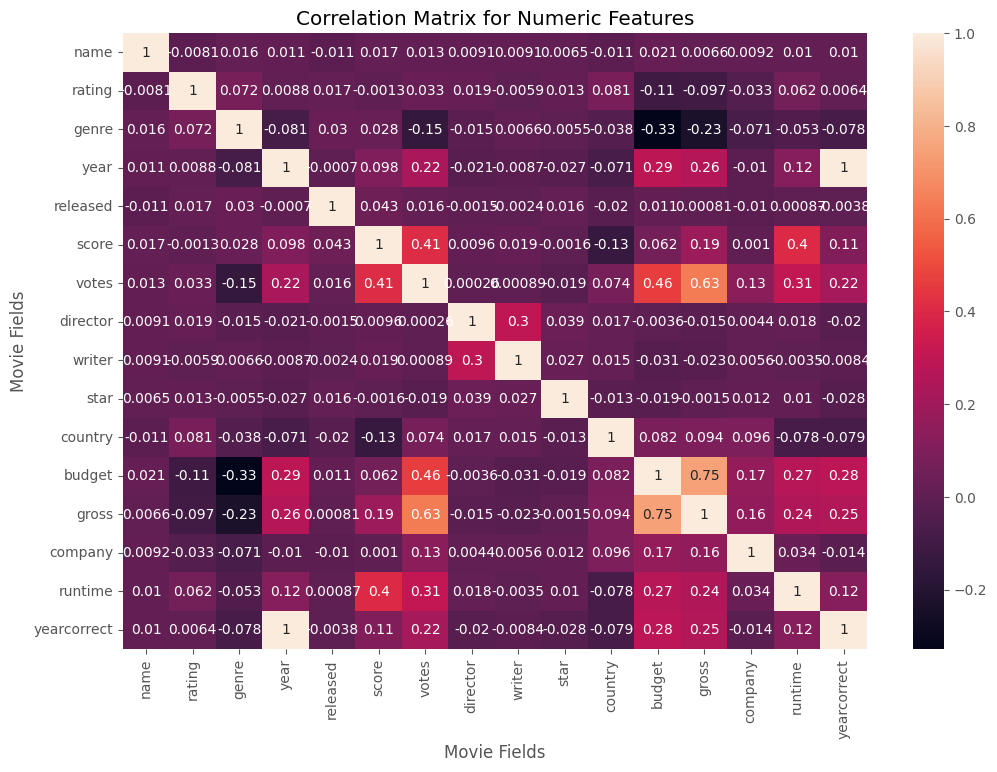

In [53]:

correlation_matrix = df_normalized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Fields')
plt.ylabel('Movie Fields')
plt.show()

### Lets find the correlation between features which have above 0.5 value 


In [54]:
# Lets find the correlation between features which have above 0.5 value 


sorted_corr = df_normalized.corr().unstack().sort_values()
high_corr = sorted_corr[(sorted_corr) > 0.5]
high_corr = high_corr[(high_corr) < 0.9]

In [55]:
high_corr

gross   votes     0.632103
votes   gross     0.632103
gross   budget    0.745881
budget  gross     0.745881
dtype: float64

#### We found that there is high correlation between 'Gross' feature and 'Votes' feature as well as with 'Gross' feature and 'Budget' features 